In [1]:
import pandas as pd #toolbox to work with dataframes
import numpy as np #toolbox to work with narrays
import matplotlib.pyplot as plt #toolbox to do plots
from sklearn.svm import SVC #load the support vector machine model functions
from sklearn.model_selection import train_test_split #load the function to split train and test sets
from sklearn import metrics # get the report
from sklearn.metrics import classification_report # get the report
from sklearn import preprocessing # normalize the features
from sklearn.preprocessing import MinMaxScaler # normalize the features
from sklearn.feature_selection import SelectKBest #load the feature selector model  
from sklearn.feature_selection import chi2 #feature selector algorithm

def normalized_data (df,t):

    if (t==1):
        d=df.copy() # min max normalization
        for each_collum in range(0,df.shape[1]):
            max =df.iloc[:,each_collum].max()
            min =df.iloc[:,each_collum].min()
            d.iloc[:,each_collum]=(d.iloc[:,each_collum]-min)/(max-min)
    elif (t==2):
        d=df.copy() # mean normalization
        for each_collum in range(0,df.shape[1]):
            max =df.iloc[:,each_collum].max()
            min =df.iloc[:,each_collum].min()
            mean =df.iloc[:,each_collum].mean()
            d.iloc[:,each_collum]=(d.iloc[:,each_collum]-mean)/(max-min)
    
    else:
        d=df.copy() # standardization
        for each_collum in range(0,df.shape[1]):
            mean =df.iloc[:,each_collum].mean()
            std =df.iloc[:,each_collum].std()
            d.iloc[:,each_collum]=(d.iloc[:,each_collum]-mean)/(std)

    return d

In [2]:
# 1st step database opening
df = pd.read_csv('winequality-white.csv',';') #open the database
#classes = df.iloc[:,-1].unique()
#print(classes)

t_label = df.iloc[:,-1]
#remove target from database
df=df.iloc[:,:-1]

C:\Users\prodrigues\AppData\Local\Temp\ipykernel_17216\3149774631.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('winequality-white.csv',';') #open the database


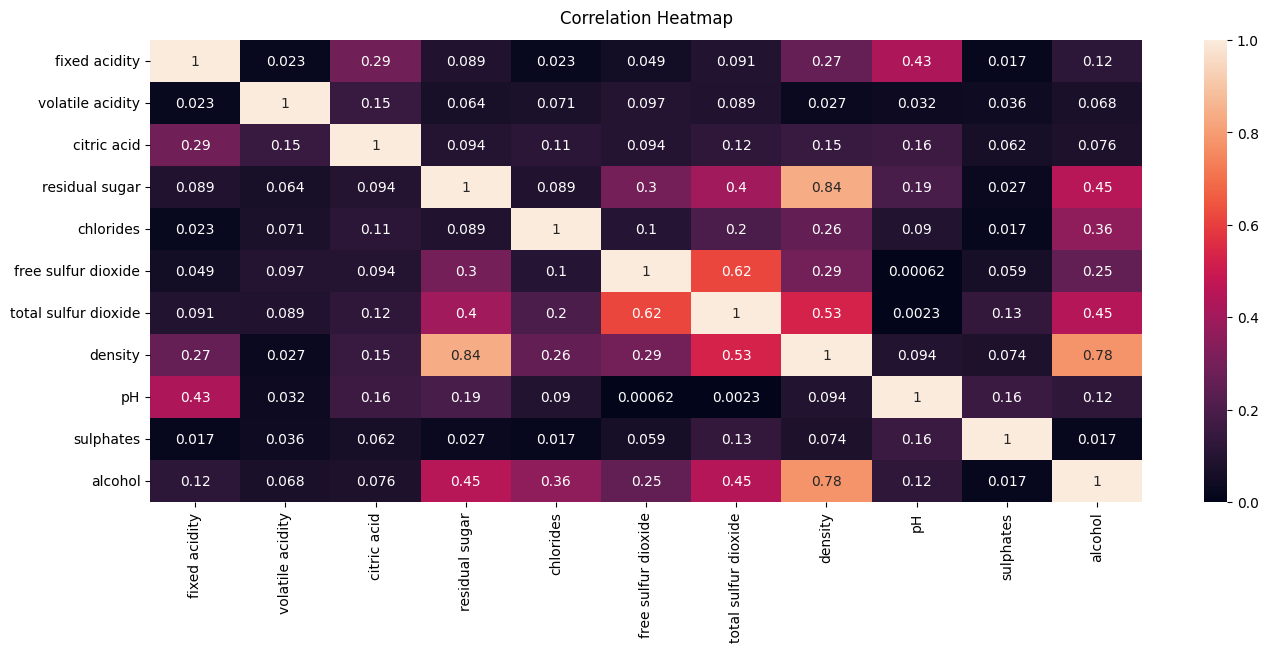

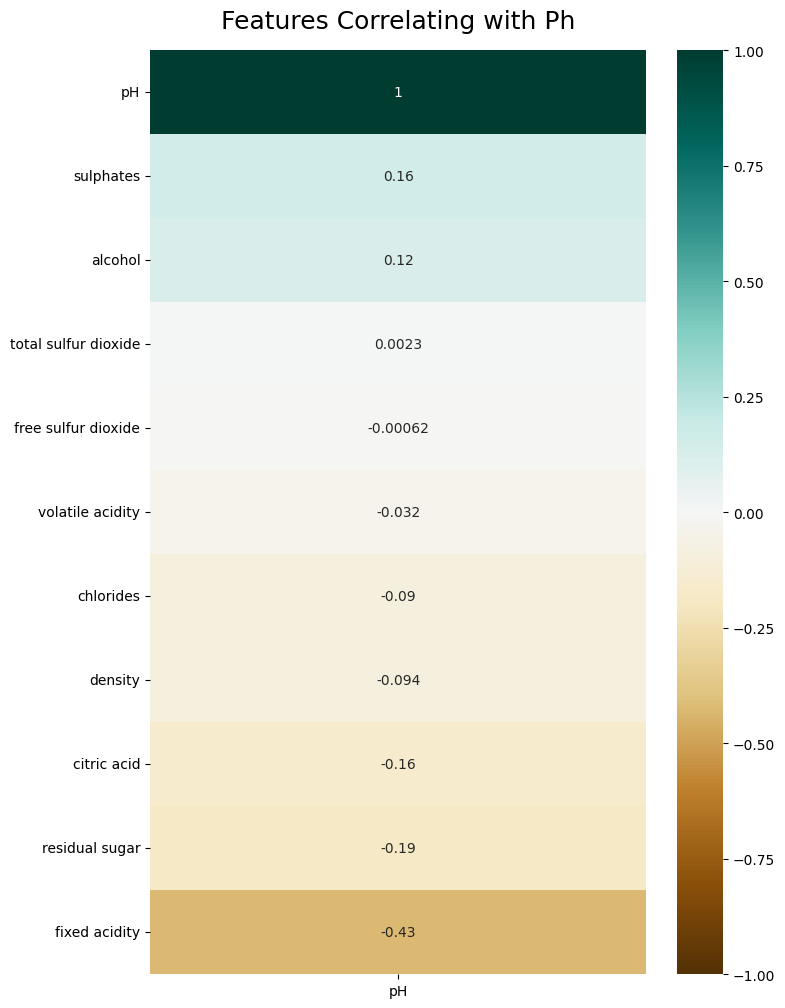

In [13]:
# 2nd step - features normalization
d_n=normalized_data (df,1)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(abs(d_n.corr()), vmin=0, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(d_n.corr()[['pH']].sort_values(by='pH', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Ph', fontdict={'fontsize':18}, pad=16);


C:\Users\prodrigues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy score: 0.038383013474887706
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  2   4   3   3   5   3   0   0   0   0]
 [ 14  48  34  19  28  15   5   0   0   0]
 [112 441 234 140 477  34  19   0   0   0]
 [341 352 446 238 394 304 123   0   0   0]
 [162  29 163  52  82 256 136   0   0   0]
 [ 26   5  21   6  15  67  35   0   0   0]
 [  0   0   1   0   0   3   1   0   0   0]]


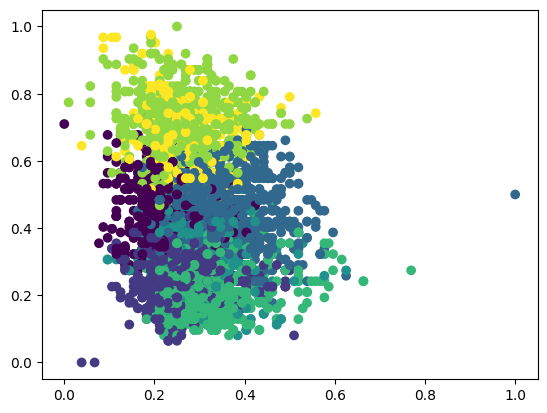

In [4]:
# 3rd step - load and design the classifiers
import matplotlib.pyplot as plt

#The simplest, yet effective clustering algorithm. Needs to be provided with the number of clusters in advance, and assumes that the data is normalized as input (but use a PCA model as preprocessor).
from sklearn.cluster import KMeans #K-Means Clustering

# Can find better looking clusters than KMeans but is not scalable to high number of samples.
from sklearn.cluster import MeanShift #K-Means Clustering

#Clustering algorithm based on message passing between data points.
from sklearn.cluster import AffinityPropagation #K-Means Clustering

#KMeans applied to a projection of the normalized graph Laplacian: finds normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
from sklearn.cluster import SpectralClustering #K-Means Clustering

from sklearn.cluster import AgglomerativeClustering #Hierarchical Clustering

#Can detect irregularly shaped clusters based on density, i.e. sparse regions in the input space are likely to become inter-cluster boundaries. Can also detect outliers (samples that are not part of a cluster).
from sklearn.cluster import DBSCAN #Density-Based Spatial Clustering of Applications with Noise

classifiers = [
    KMeans(n_clusters=7),
    MeanShift(bandwidth=1),
    AffinityPropagation(),
    SpectralClustering(n_clusters=7),
    AgglomerativeClustering(n_clusters=7),
    DBSCAN(eps=0.3, min_samples=7)
]

y_pred=classifiers[0].fit_predict(d_n)

from sklearn import metrics
metrics.v_measure_score(y_pred,t_label)

plt.scatter(d_n.iloc[:, 0], d_n.iloc[:, 10], c=y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score:', accuracy_score(t_label, y_pred))
print(confusion_matrix(t_label, y_pred))
